In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd 'drive/My Drive/College/Fall 2022/ML 4641'
%cd 'drive/My Drive/College/Fall 2022/ML 4641'
# %ls

/content/drive/My Drive/College/Fall 2022/ML 4641


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from CreditCardData import CreditCardData
from sklearn.ensemble import RandomForestClassifier
from sklearn import mixture, metrics
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score

import time

In [ ]:
ccd = CreditCardData(split=True)
ccd.split_data()

smote = SMOTE(random_state=42) # desired ratio minority/majority = 0.1
X_smote, y_smote = smote.fit_resample(ccd.data_train, ccd.labels_train)

In [ ]:
info = {
  "Recall": [],
  "Balanced Accuracy": [],
  "Precision": [],
  "AUC-ROC": [],
  "CM": [],
  "Accuracy": [],
}

maxdepths = range(10, 20, 2)
for i in maxdepths:
  print (f"\n\n------- i = {i} --------------")
  start = time.time()
  forest = RandomForestClassifier(max_depth=i, random_state=0, verbose=True)
  forest.fit(X_smote, y_smote)
  labels_pred_test = forest.predict(ccd.data_test)
  score = forest.score(ccd.data_test, ccd.labels_test)
  print("SCORE FOR FOREST", score)

  info["Accuracy"].append(score)

  confusion_matrix = metrics.confusion_matrix(ccd.labels_test, labels_pred_test, normalize = 'true')
  print(confusion_matrix); 

  recall = metrics.recall_score(ccd.labels_test, labels_pred_test, average='macro')
  print("Recall:", recall)
  info["Recall"].append(recall)


  balanced_accuracy = metrics.balanced_accuracy_score(ccd.labels_test, labels_pred_test)
  print("balanced_accuracy:", balanced_accuracy)
  info["Balanced Accuracy"].append(balanced_accuracy)


  precision_score = metrics.precision_score(ccd.labels_test, labels_pred_test)
  print("precision_score:", precision_score)
  info["Precision"].append(precision_score)


  report = metrics.classification_report(ccd.labels_test, labels_pred_test)
  print(report)


  ############################## POST-PROCESSING: CONFUSION MATRIX ##############################

  aucroc = roc_auc_score(ccd.labels_test, labels_pred_test)
  print("AUCROC:", aucroc)

  info["AUC-ROC"].append(aucroc)



  # calc confusion matix
  cm = metrics.confusion_matrix(ccd.labels_test, labels_pred_test)
  print("Confusion Matrix\n", cm)
  info["CM"].append(cm)
  end = time.time()
  print("TIME", (end - start)/60)

# # show confusion matrix
# plt.figure(figsize=(9,9))
# plt.imshow(cm, cmap='Blues')
# plt.title('Confusion matrix', size=15)
# plt.colorbar()

# plt.xticks([0, 1], ["0", "1"], rotation=45, size=2)
# plt.yticks([0, 1], ["0", "1"], size = 2)

# plt.tight_layout()
# plt.ylabel('Actual label', size=15)
# plt.xlabel('Predicted label', size = 15)
# width, height = cm.shape
# for x in range(width):
#  for y in range(height):
#   plt.annotate(str(cm[x][y]), xy=(y, x), 
#     horizontalalignment='center',
#     verticalalignment='center')

# plt.show()



------- i = 10 --------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


SCORE FOR FOREST 0.9988588883817282
[[9.99050416e-01 9.49584117e-04]
 [1.15789474e-01 8.84210526e-01]]
Recall: 0.9416304710992316
balanced_accuracy: 0.9416304710992316
precision_score: 0.6086956521739131
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.61      0.88      0.72        95

    accuracy                           1.00     56962
   macro avg       0.80      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962

AUCROC: 0.9416304710992316
Confusion Matrix
 [[56813    54]
 [   11    84]]
TIME 5.7844152013460794


------- i = 12 --------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


SCORE FOR FOREST 0.9992451107756047
[[9.99437283e-01 5.62716514e-04]
 [1.15789474e-01 8.84210526e-01]]
Recall: 0.9418239049009092
balanced_accuracy: 0.9418239049009092
precision_score: 0.7241379310344828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.72      0.88      0.80        95

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

AUCROC: 0.9418239049009092
Confusion Matrix
 [[56835    32]
 [   11    84]]
TIME 6.5951479037602745


------- i = 14 --------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


SCORE FOR FOREST 0.9993328885923949
[[9.99560378e-01 4.39622277e-04]
 [1.36842105e-01 8.63157895e-01]]
Recall: 0.931359136230151
balanced_accuracy: 0.931359136230151
precision_score: 0.7663551401869159
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.77      0.86      0.81        95

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUCROC: 0.9313591362301511
Confusion Matrix
 [[56842    25]
 [   13    82]]
TIME 7.112978728612264


------- i = 16 --------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


SCORE FOR FOREST 0.999403110845827
[[9.99630717e-01 3.69282712e-04]
 [1.36842105e-01 8.63157895e-01]]
Recall: 0.9313943060122742
balanced_accuracy: 0.9313943060122742
precision_score: 0.7961165048543689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.80      0.86      0.83        95

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUCROC: 0.9313943060122741
Confusion Matrix
 [[56846    21]
 [   13    82]]
TIME 7.710731442769369


------- i = 18 --------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SCORE FOR FOREST 0.9994733330992591
[[9.99718642e-01 2.81358257e-04]
 [1.47368421e-01 8.52631579e-01]]
Recall: 0.9261751103451914
balanced_accuracy: 0.9261751103451914
precision_score: 0.8350515463917526
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.84      0.85      0.84        95

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUCROC: 0.9261751103451914
Confusion Matrix
 [[56851    16]
 [   14    81]]
TIME 8.142105646928151


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


{'Recall': [0.9416304710992316, 0.9418239049009092, 0.931359136230151, 0.9313943060122742, 0.9261751103451914], 'Balanced Accuracy': [0.9416304710992316, 0.9418239049009092, 0.931359136230151, 0.9313943060122742, 0.9261751103451914], 'Precision': [0.6086956521739131, 0.7241379310344828, 0.7663551401869159, 0.7961165048543689, 0.8350515463917526], 'AUC-ROC': [0.9416304710992316, 0.9418239049009092, 0.9313591362301511, 0.9313943060122741, 0.9261751103451914], 'CM': [array([[56813,    54],
       [   11,    84]]), array([[56835,    32],
       [   11,    84]]), array([[56842,    25],
       [   13,    82]]), array([[56846,    21],
       [   13,    82]]), array([[56851,    16],
       [   14,    81]])], 'Accuracy': [0.9988588883817282, 0.9992451107756047, 0.9993328885923949, 0.999403110845827, 0.9994733330992591]}


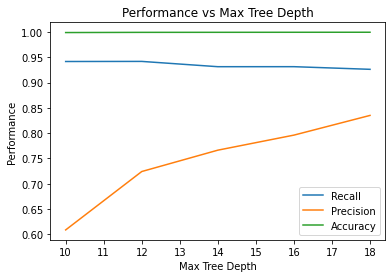

In [ ]:
print(info)

# plot lines
plt.plot(maxdepths, info["Recall"], label = "Recall")
# plt.plot(maxdepths, info["AUC-ROC"], label = "AUC-ROC")
plt.plot(maxdepths, info["Precision"], label = "Precision")
plt.plot(maxdepths, info["Accuracy"], label = "Accuracy")
plt.title('Performance vs Max Tree Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Performance')
plt.legend()
plt.show()
